In [4]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch

# Exploratory Data Analysis

In [5]:
### Wyscout Data legacy version tagnames mapping########
tags2name = pd.read_csv("/home/shivargha/football_analytics/data/wyscout_data/tags2name.csv",sep=";")
tags_dict = tags2name.set_index("Tag").to_dict()["Description"]
tags_dict

{101: 'Goal',
 102: 'Own goal',
 301: 'Assist',
 302: 'Key pass',
 1901: 'Counter attack',
 401: 'Left foot',
 402: 'Right foot',
 403: 'Head/body',
 1101: 'Direct',
 1102: 'Indirect',
 2001: 'Dangerous ball lost',
 2101: 'Blocked',
 801: 'High',
 802: 'Low',
 1401: 'Interception',
 1501: 'Clearance',
 201: 'Opportunity',
 1301: 'Feint',
 1302: 'Missed ball',
 501: 'Free space right',
 502: 'Free space left',
 503: 'Take on left',
 504: 'Take on right',
 1601: 'Sliding tackle',
 601: 'Anticipated',
 602: 'Anticipation',
 1701: 'Red card',
 1702: 'Yellow card',
 1703: 'Second yellow card',
 1201: 'Position: Goal low center',
 1202: 'Position: Goal low right',
 1203: 'Position: Goal center',
 1204: 'Position: Goal center left',
 1205: 'Position: Goal low left',
 1206: 'Position: Goal center right',
 1207: 'Position: Goal high center',
 1208: 'Position: Goal high left',
 1209: 'Position: Goal high right',
 1210: 'Position: Out low right',
 1211: 'Position: Out center left',
 1212: 'Positi

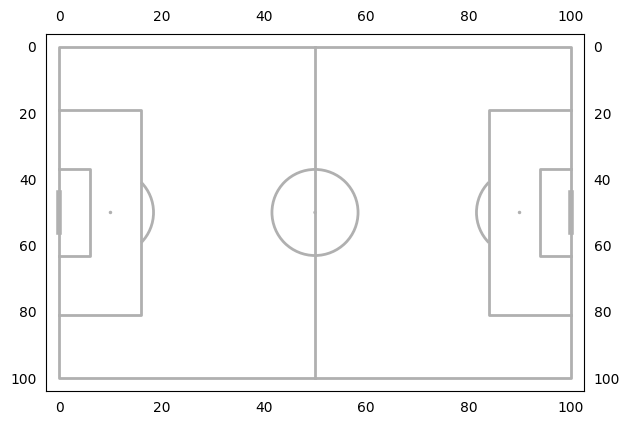

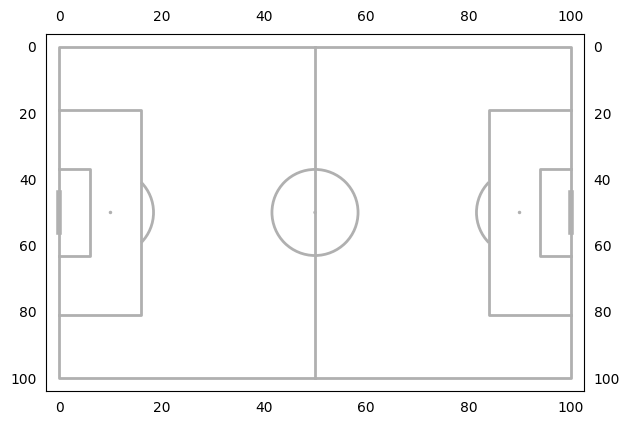

In [6]:
#### Create a Pitch Map for wyscout data ####
pitch1 = Pitch(pitch_type='wyscout',  # example plotting a tracab pitch
              pitch_length=100, pitch_width=100,
              axis=True, label=True) 
pitch2 = Pitch(pitch_type='wyscout',  # example plotting a tracab pitch
              pitch_length=100, pitch_width=100,
              axis=True, label=True) 
fig1, ax1 = pitch1.draw()
fig2, ax2 = pitch2.draw()

In [7]:
data_folder = "/home/shivargha/football_analytics/data/wyscout_data/events/"
for file in os.listdir(data_folder):
    #### open the data #####
    with open(data_folder+file) as f:
        data = json.load(f)
    
    for index,row in enumerate(data):
        if row["eventName"] == "Shot":
            tags = [tags_dict[i["id"]] for i in row["tags"]]
            #print(tags)
            if "Goal" in tags:
                #print("Yes")
                start_x,start_y = data[index]["positions"][0]["x"],data[index]["positions"][0]["y"]
                shotCircle=plt.Circle((start_x,start_y),1,color="red")
                ax1.add_patch(shotCircle)
            else:
                if "Blocked" in tags:
                    pass
                else:
                    start_x,start_y = data[index]["positions"][0]["x"],data[index]["positions"][0]["y"]
                    shotCircle=plt.Circle((start_x,start_y),1,color="blue")
                    ax2.add_patch(shotCircle)

In [ ]:
fig1

In [ ]:
fig2

In [ ]:
plt.show()

In [ ]:
with open("/home/shivargha/football_analytics/data/wyscout_data/events/events_England.json") as f:
    data_trail= json.load(f)

In [ ]:
data_trail[0]["positions"]

In [ ]:
counter = 0
for i in data_trail:
    #print(i["eventName"],i["subEventName"],i["tags"])
    if i["eventName"] == "Shot":
        tags = [tags_dict[i["id"]] for i in i["tags"]]
        print(tags)
        if "Goal" in tags:
            counter = counter + 1

In [ ]:
counter